In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir('/'.join(os.getcwd().split('/')[:-1]))

In [3]:
df = pd.read_csv('Dados/facies_dataset_reg_pe.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk,Pe_reg
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1,3.174660
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1,3.175835
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1,3.159861
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1,3.134041
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1,3.157286


### Regressão do PE

In [4]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'Labels_char', 'PHID',
       'PHIN', 'Formation_num', 'Formation_numsk', 'Pe_reg'],
      dtype='object')

In [5]:
dataset = df[~df.PE.isnull()]
dataset.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk,Pe_reg
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1,3.174660
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1,3.175835
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1,3.159861
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1,3.134041
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1,3.157286


In [6]:
X = dataset[['GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS', 'PHID',
       'PHIN', 'Formation_num']]
y = dataset['PE']

#### Separando treino e teste 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Regressão com Árvores utilizando todos os atributos

In [8]:
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [9]:
print('Erro treinamento')
print(mean_squared_error(y_train,dtr.predict(X_train)))
print('')
print('Erro teste')
print(mean_squared_error(y_test,dtr.predict(X_test)))

Erro treinamento
0.09335770068691585

Erro teste
0.28150100939012945


In [10]:
mean_squared_error(y_train,dataset.Pe_reg[X_train.index])

0.35069166787144823

#### Analisando atributos

In [11]:
dtr = DecisionTreeRegressor(max_depth=4)

In [12]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [13]:
from sklearn.tree import plot_tree

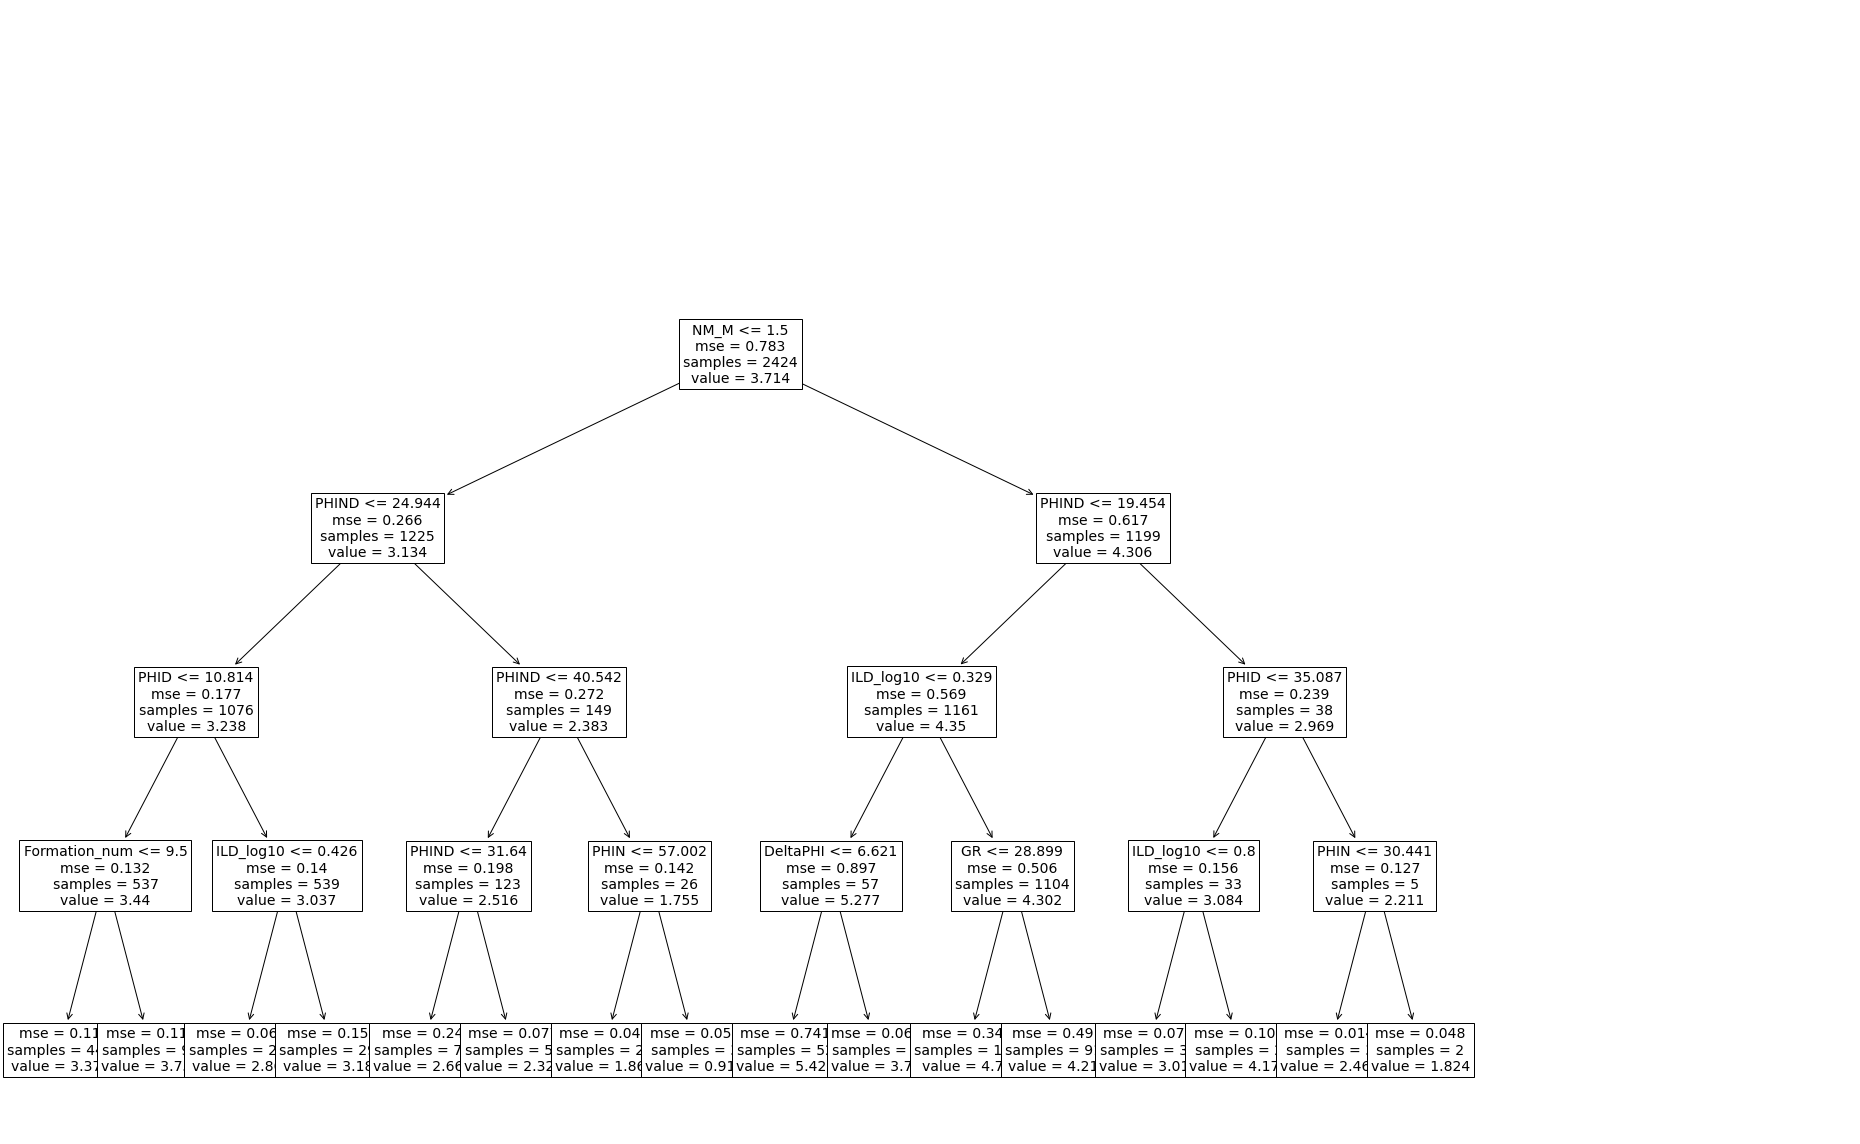

In [14]:
fig,axes = plt.subplots(figsize=(26,16))
plot_tree(dtr,feature_names=X_train.columns,fontsize=14)
fig.tight_layout()

In [15]:
print('Atributo \t Importância do atributo')
for i,j in zip(X_train.columns,dtr.feature_importances_):
    print(f'{i} \t \t {j}')

Atributo 	 Importância do atributo
GR 	 	 0.03571948091139761
ILD_log10 	 	 0.05629081877715891
DeltaPHI 	 	 0.010246717392315382
PHIND 	 	 0.1517793520668124
NM_M 	 	 0.6949410959261205
RELPOS 	 	 0.0
PHID 	 	 0.03929671807646101
PHIN 	 	 0.0024322101100321494
Formation_num 	 	 0.009293606739702073


In [16]:
pd.DataFrame(zip(X_train.columns,dtr.feature_importances_)).sort_values(by=1,ascending=False)

,0,1
4,NM_M,0.694941
3,PHIND,0.151779
1,ILD_log10,0.056291
6,PHID,0.039297
0,GR,0.035719
2,DeltaPHI,0.010247
8,Formation_num,0.009294
7,PHIN,0.002432
5,RELPOS,0.000000


#### Criando um modelo de PE utilizando as variáveis melhores rankeadas

In [40]:
cols = ['NM_M','PHIND','ILD_log10','PHID','GR','DeltaPHI']

X_t = X_train[cols]

In [41]:
dtr = DecisionTreeRegressor(max_depth=10)

In [42]:
dtr.fit(X_train[cols],y_train,)

print('Erro treinamento')
print(mean_squared_error(y_train,dtr.predict(X_train[cols])))
print('')
print('Erro teste')
print(mean_squared_error(y_test,dtr.predict(X_test[cols])))

Erro treinamento
0.12238108132862

Erro teste
0.35982343110707715


#### Otimizando o modelo avaliando a profundidade máxima 

In [43]:
mse_train = []
mse_test = []
for i in range(4,30):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train[cols],y_train)
    mse_train.append(mean_squared_error(y_train,dtr.predict(X_train[cols])))
    mse_test.append(mean_squared_error(y_test,dtr.predict(X_test[cols])))

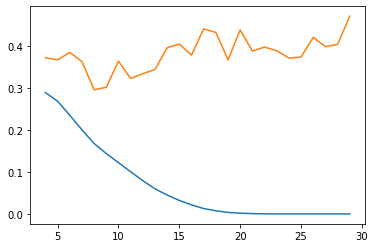

In [44]:
plt.plot(np.arange(4,30),mse_train,label='MSE Treino')
plt.plot(np.arange(4,30),mse_test,label='MSE Teste')

#### Random Forest (Ensemble Methods)

In [45]:
rfc = RandomForestRegressor(n_estimators=10,max_depth=8)
rfc.fit(X_train[cols],y_train)

RandomForestRegressor(max_depth=8, n_estimators=10)

In [46]:
print('Erro treinamento')
print(mean_squared_error(y_train,rfc.predict(X_train[cols])))
print('')
print('Erro teste')
print(mean_squared_error(y_test,rfc.predict(X_test[cols])))

Erro treinamento
0.14997403763203151

Erro teste
0.25180768684973115


#### Otimizando o parâmetro

In [49]:
mse_train = []
mse_test = []
for i in range(5,40):
    rfc = RandomForestRegressor(n_estimators=i,max_depth=9,n_jobs=-1)
    rfc.fit(X_train[cols],y_train)
    mse_train.append(mean_squared_error(y_train,rfc.predict(X_train[cols])))
    mse_test.append(mean_squared_error(y_test,rfc.predict(X_test[cols])))

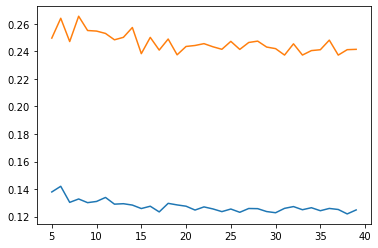

In [51]:
plt.plot(np.arange(5,40),mse_train,label='MSE Treino')
plt.plot(np.arange(5,40),mse_test,label='MSE Teste')

#### Retreinando

In [52]:
rfc = RandomForestRegressor(n_estimators=15,max_depth=8)
rfc.fit(X_train[cols],y_train)

print('Erro treinamento')
print(mean_squared_error(y_train,rfc.predict(X_train[cols])))
print('')
print('Erro teste')
print(mean_squared_error(y_test,rfc.predict(X_test[cols])))

Erro treinamento
0.15301317046175492

Erro teste
0.2562035416295256


In [57]:
df['Pe_Reg_RFC'] = df.PE.copy()
df['Pe_Reg_RFC'].loc[df.PE.isnull()] = rfc.predict(df[df.PE.isnull()][cols])

/home/alexsandro/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [78]:
cols_2 = ['GR','ILD_log10','Pe_reg','Pe_Reg_RFC']
well = 'KIMZEY A'

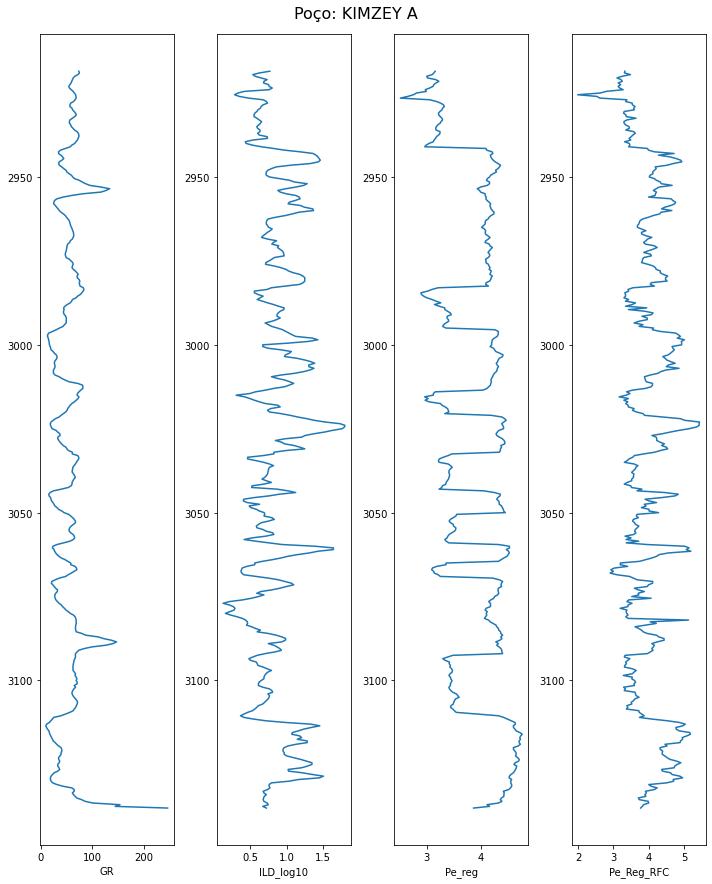

In [84]:
fig,axes = plt.subplots(ncols=4,figsize=(10,12))

for ax in axes:
    ax.invert_yaxis()

for i,ax in zip(cols_2,axes):
    ax.plot(df[df['Well Name']==well][i],df[df['Well Name']==well]['Depth'])
    ax.set_xlabel(i)

fig.suptitle(f'Poço: {well}', fontsize=16,y=1.02)
    
fig.tight_layout()

In [ ]:
df[df.PE.isnull()]a